In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("kc_house_data.csv")
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
space = dataset["sqft_living"]
price = dataset["price"]

In [4]:
x = np.array(space).reshape(-1,1)
y = np.array(price)

In [5]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [6]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [7]:
print(dataset.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [10]:
x_train.shape

(14408, 1)

In [11]:
x_test.shape

(7205, 1)

In [12]:
y_train.shape

(14408,)

In [13]:
y_test.shape

(7205,)

In [14]:
y_pred.shape

(7205,)

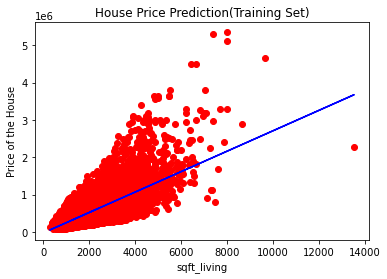

In [15]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train),color="blue")
plt.title("House Price Prediction(Training Set)")
plt.xlabel("sqft_living")
plt.ylabel("Price of the House")
plt.show()

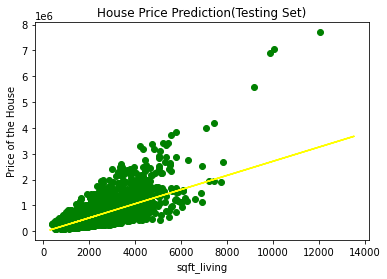

In [16]:
plt.scatter(x_test,y_test,color="green")
plt.plot(x_train,regressor.predict(x_train),color="yellow")
plt.title("House Price Prediction(Testing Set)")
plt.xlabel("sqft_living")
plt.ylabel("Price of the House")
plt.show()

In [17]:
bias = regressor.score(x_train,y_train)
bias

0.4884262519299548

In [18]:
variance = regressor.score(x_test,y_test)
variance

0.5000063123558641